# 📊 Credit Risk Analysis

This project aims to predict credit risk by determining which customers are likely to pay their loans on time and which are not. We'll employ various data science techniques and methodologies.

## 🎯 Objectives

We will cover the following concepts:

1. **🔍 Exploratory Data Analysis (EDA)**:
   - Analyze the dataset to uncover patterns, spot anomalies, and check assumptions using statistical summaries and visualizations.

2. **🛠️ Data Preprocessing**:
   - Clean the data, handle missing values, encode categorical variables, normalize data, and split into training and testing sets.

3. **⭐ Feature Importance**:
   - Identify key features influencing `loan_status` to improve model performance and interpretability.

4. **🔽 Dimensionality Reduction**:
   - Use techniques like PCA to reduce the number of features while retaining essential information, speeding up model training, and reducing overfitting.

5. **🤖 Predictive Modeling**:
   - Build various models (logistic regression, decision trees, random forests, gradient boosting) to predict the target variable `loan_status`.

6. **⚙️ Hyperparameter Optimization**:
   - Perform hyperparameter tuning with Optuna to find the best parameters for our models.

7. **🧪 Model Testing**:
   - Evaluate models using metrics like accuracy, precision, recall, F1 score, and AUC-ROC to test performance on unseen data.

## 🎯 Goal

Predict the `loan_status` to determine the likelihood of customers paying their loans on time. This helps financial institutions make informed loan approval decisions and manage risk effectively.


# 📖 Data Dictionary

| Column Name            | Description                                                                                           |
|------------------------|-------------------------------------------------------------------------------------------------------|
| out_prncp_inv          | Remaining outstanding principal for portion of total amount funded by investors                       |
| policy_code            | Publicly available policy_code=1. <br> New products not publicly available policy_code=2                   |
| pub_rec                | Number of derogatory public records                                                                   |
| purpose                | A category provided by the borrower for the loan request.                                             |
| pymnt_plan             | Indicates if a payment plan has been put in place for the loan                                        |
| recoveries             | Post charge off gross recovery                                                                        |
| revol_bal              | Total credit revolving balance                                                                        |
| revol_util             | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| sub_grade              | LC assigned loan subgrade                                                                             |
| term                   | The number of payments on the loan. Values are in months and can be either 36 or 60.                  |
| title                  | The loan title provided by the borrower                                                               |
| total_acc              | The total number of credit lines currently in the borrower's credit file                              |
| total_pymnt            | Payments received to date for total amount funded                                                     |
| total_pymnt_inv        | Payments received to date for portion of total amount funded by investors                             |
| total_rec_int          | Interest received to date                                                                             |
| total_rec_late_fee     | Late fees received to date                                                                            |
| total_rec_prncp        | Principal received to date                                                                            |
| url                    | URL for the LC page with listing data.                                                                |
| verified_status_joint  | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified |
| zip_code               | The first 3 numbers of the zip code provided by the borrower in the loan application.                 |
| open_acc_6m            | Number of open trades in last 6 months                                                                |
| open_il_6m             | Number of currently active installment trades                                                         |
| open_il_12m            | Number of installment accounts opened in past 12 months                                               |
| open_il_24m            | Number of installment accounts opened in past 24 months                                               |
| mths_since_rcnt_il     | Months since most recent installment accounts opened                                                  |
| total_bal_il           | Total current balance of all installment accounts                                                     |
| il_util                | Ratio of total current balance to high credit/credit limit on all install acct                        |
| open_rv_12m            | Number of revolving trades opened in past 12 months                                                   |
| open_rv_24m            | Number of revolving trades opened in past 24 months                                                   |
| max_bal_bc             | Maximum current balance owed on all revolving accounts                                                |
| all_util               | Balance to credit limit on all trades                                                                 |
| total_rev_hi_lim       | Total revolving high credit/credit limit                                                              |
| inq_fi                 | Number of personal finance inquiries                                                                  |
| total_cu_tl            | Number of finance trades                                                                              |
| inq_last_12m           | Number of credit inquiries in past 12 months                                                          |
| acc_now_delinq         | The number of accounts on which the borrower is now delinquent.                                       |
| tot_coll_amt           | Total collection amounts ever owed                                                                    |
| tot_cur_bal            | Total current balance of all accounts                                                                 |

#### * Employer Title replaces Employer Name for all loans listed after 9/23/2013



## Some important features

| Column      | Description                                  |
|-------------|----------------------------------------------|
| loan_amnt   | Amount of money requested by the borrower.   |
| int_rate    | Interest rate of the loan.                   |
| grade       | Loan grade with categories A, B, C, D, E, F, G. |
| annual_inc  | Borrower's annual income.                    |
| purpose     | The primary purpose of borrowing.            |
| installment | Monthly amount payments for opted loan.      |
| term        | Duration of the loan until it’s paid off.    |


# 🚀 Importing libraries and getting started

In [3]:
import pandas as pd
import numpy as np

import kaleido
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # Remove line 4, 6, and 7 to make the visualizations interactive. :) 
# Rendering visualizations as png to make them visible in the notebook preview and to conserve notebook size.

from sklearn import metrics
from sklearn.impute import KNNImputer, SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import re
import optuna
import joblib
import cupy as cp

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
optuna.logging.set_verbosity(optuna.logging.INFO)

seed = 0
np.random.seed(0)

In [4]:
data = pd.read_csv('C:/Users/saran/OneDrive/Documents/GitHub/credit-risk1/data/loan.csv', low_memory=False)

In [5]:
print(data.shape)
print(data.shape[0] * data.shape[1])

(887379, 74)
65666046


### We have about 887K rows and 74 columns, which amounts to about 65 million data points.

In [6]:
data['loan_status'].unique() # Understanding the target variable

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

### Here is what the terms in the target variable mean
| Term                                               | Meaning                                                                                                                                                 |
|----------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fully Paid**                                     | The borrower has completely repaid the loan.                                                                                                             |
| **Charged Off**                                    | The lender has given up on collecting the loan because the borrower hasn’t paid for a long time. The loan is considered a loss.                          |
| **Current**                                        | The borrower is making payments on time.                                                                                                                 |
| **Default**                                        | The borrower has stopped making payments for a long period, and the loan is in serious trouble.                                                          |
| **Late (31-120 days)**                             | The borrower has missed payments and is behind by 31 to 120 days.                                                                                        |
| **In Grace Period**                                | The borrower missed a payment, but the late fee hasn’t been applied yet because it’s within an allowed period after the due date.                        |
| **Late (16-30 days)**                              | The borrower is behind on payments by 16 to 30 days.                                                                                                     |
| **Does not meet the credit policy. Status: Fully Paid** | The loan didn’t meet the lender's usual criteria but was still given and has been completely repaid.                                                      |
| **Does not meet the credit policy. Status: Charged Off** | The loan didn’t meet the lender's usual criteria, was still given, but ended up in loss as the borrower didn’t repay.                                      |
| **Issued**                                         | The loan has been approved and the money has been given to the borrower.                                                                                 |


In [7]:
for i in data.columns[2:]:
    print(i)
    print(data[i].head(), '\n')

loan_amnt
0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: loan_amnt, dtype: float64 

funded_amnt
0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt, dtype: float64 

funded_amnt_inv
0     4975.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt_inv, dtype: float64 

term
0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object 

int_rate
0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64 

installment
0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64 

grade
0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object 

sub_grade
0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object 

emp_title
0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: ob

In [8]:
y = data['loan_status']

In [9]:
y.isna().sum()

0

No null values in target column.

In [10]:
X = data.drop(columns='loan_status')

In [11]:
X.shape

(887379, 73)

In [12]:
print('Number of null data points:', X.isna().sum().sum())
print('Percentage of null data:', round( (X.isna().sum().sum() / (X.shape[0]*X.shape[1]) ) * 100, 2), '%')    

Number of null data points: 17998493
Percentage of null data: 27.78 %


In [13]:
for i in X.columns:
    null = ( X[i].isna().sum() / len(X[i]) ) * 100
    print(f'Percentage null values in {i}: {round(null, 2)}%')

Percentage null values in id: 0.0%
Percentage null values in member_id: 0.0%
Percentage null values in loan_amnt: 0.0%
Percentage null values in funded_amnt: 0.0%
Percentage null values in funded_amnt_inv: 0.0%
Percentage null values in term: 0.0%
Percentage null values in int_rate: 0.0%
Percentage null values in installment: 0.0%
Percentage null values in grade: 0.0%
Percentage null values in sub_grade: 0.0%
Percentage null values in emp_title: 5.8%
Percentage null values in emp_length: 5.05%
Percentage null values in home_ownership: 0.0%
Percentage null values in annual_inc: 0.0%
Percentage null values in verification_status: 0.0%
Percentage null values in issue_d: 0.0%
Percentage null values in pymnt_plan: 0.0%
Percentage null values in url: 0.0%
Percentage null values in desc: 85.8%
Percentage null values in purpose: 0.0%
Percentage null values in title: 0.02%
Percentage null values in zip_code: 0.0%
Percentage null values in addr_state: 0.0%
Percentage null values in dti: 0.0%
Per

Many features have a high percentage of null values.<br /> We will drop features with more than 97% null values.<br /> For the remaining features with a high percentage of nulls, we will handle them differently.

In [14]:
dropped_list = [] # list to track dropped features
for i in X.columns:
    null = ( X[i].isna().sum() / len(X[i]) ) * 100 
    if null < 97:
        print(f'Percentage null values in {i}: {round(null, 2)}%')

    if null > 97:
        print(f'Percentage null values in {i}: {round(null, 2)}% -- FEATURE DROPPED')
        dropped_list.append(i)
        X.drop(columns=i, inplace = True)

print('Total features dropped: ', len(dropped_list))

Percentage null values in id: 0.0%
Percentage null values in member_id: 0.0%
Percentage null values in loan_amnt: 0.0%
Percentage null values in funded_amnt: 0.0%
Percentage null values in funded_amnt_inv: 0.0%
Percentage null values in term: 0.0%
Percentage null values in int_rate: 0.0%
Percentage null values in installment: 0.0%
Percentage null values in grade: 0.0%
Percentage null values in sub_grade: 0.0%
Percentage null values in emp_title: 5.8%
Percentage null values in emp_length: 5.05%
Percentage null values in home_ownership: 0.0%
Percentage null values in annual_inc: 0.0%
Percentage null values in verification_status: 0.0%
Percentage null values in issue_d: 0.0%
Percentage null values in pymnt_plan: 0.0%
Percentage null values in url: 0.0%
Percentage null values in desc: 85.8%
Percentage null values in purpose: 0.0%
Percentage null values in title: 0.02%
Percentage null values in zip_code: 0.0%
Percentage null values in addr_state: 0.0%
Percentage null values in dti: 0.0%
Per

In [15]:
X.shape

(887379, 56)

17 feautures have been dropped.

In [16]:
for i in X.columns:
    null = ( X[i].isna().sum() / len(X[i]) ) * 100
    if null > 50:
        print(f'Percentage null values in {i}: {round(null, 2)}%')
    else:
        pass

Percentage null values in desc: 85.8%
Percentage null values in mths_since_last_delinq: 51.2%
Percentage null values in mths_since_last_record: 84.56%
Percentage null values in mths_since_last_major_derog: 75.02%


We will drop the description feature, and impute other features with 0.

In [17]:
X.drop(columns = 'desc', inplace = True)
dropped_list.append('desc')

In [18]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

In [19]:
print('NUMERICAL COLUMNS\n')
count_num = 0
count_cat = 0
for i in num_cols:
    null = ( X[i].isna().sum() / len(X[i]) ) * 100
    if null > 0:
        count_num = count_num + 1
        print(f'Percentage null values in {i}: {round(null, 2)}%')
        print(f'Total null values in {i}: {X[i].isna().sum()}\n')
    

print('\nCATEGORICAL COLUMNS\n')
for i in cat_cols:
    null = ( X[i].isna().sum() / len(X[i]) ) * 100
    if null > 0:
        count_cat = count_cat + 1
        print(f'Percentage null values in {i}: {round(null, 2)}%')
        print(f'Total null values in {i}: {X[i].isna().sum()}\n')
    
print(f'Total numeric null features: {count_num}')
print(f'Total categorical null features: {count_cat}')

NUMERICAL COLUMNS

Percentage null values in annual_inc: 0.0%
Total null values in annual_inc: 4

Percentage null values in delinq_2yrs: 0.0%
Total null values in delinq_2yrs: 29

Percentage null values in inq_last_6mths: 0.0%
Total null values in inq_last_6mths: 29

Percentage null values in mths_since_last_delinq: 51.2%
Total null values in mths_since_last_delinq: 454312

Percentage null values in mths_since_last_record: 84.56%
Total null values in mths_since_last_record: 750326

Percentage null values in open_acc: 0.0%
Total null values in open_acc: 29

Percentage null values in pub_rec: 0.0%
Total null values in pub_rec: 29

Percentage null values in revol_util: 0.06%
Total null values in revol_util: 502

Percentage null values in total_acc: 0.0%
Total null values in total_acc: 29

Percentage null values in collections_12_mths_ex_med: 0.02%
Total null values in collections_12_mths_ex_med: 145

Percentage null values in mths_since_last_major_derog: 75.02%
Total null values in mths_s

In [20]:
X.drop(columns = ['id', 'member_id'], inplace = True)
dropped_list.append('id')
dropped_list.append('member_id')
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [21]:
num_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype='object')

In [22]:
knn_imp = KNNImputer(add_indicator = True)
simp_imp = SimpleImputer(strategy = 'constant',
                         fill_value = 0.0)
mi = MissingIndicator()

In [23]:
new_data = X.copy()

In [24]:
for i in num_cols: # Adding a missing indicator for each numerical column with nan values
    if new_data[i].isna().sum() > 0:
        temp = mi.fit_transform(new_data[[i]])
        loc = new_data.columns.get_loc(i)
        new_data.insert(loc+1, value = temp, column = f'{i}_MISSING_INDICATOR')

In [25]:
new_data.shape

(887379, 68)

We have added 15 missing indiactors for 15 columns with missing values.

In [26]:
new_data[num_cols].isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          4
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        502
total_acc                          29
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_amnt                     0
collections_

Now we impute missing numerical values.

In [27]:
new_data['annual_inc'] = knn_imp.fit_transform(new_data[['annual_inc']])

In [28]:
new_data['annual_inc'].isna().sum()

0

In [29]:
for i in num_cols:
    if new_data[i].isna().sum() > 0:
        new_data[i] = simp_imp.fit_transform(new_data[[i]])
        

In [30]:
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,annual_inc_MISSING_INDICATOR,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,delinq_2yrs_MISSING_INDICATOR,earliest_cr_line,inq_last_6mths,inq_last_6mths_MISSING_INDICATOR,mths_since_last_delinq,mths_since_last_delinq_MISSING_INDICATOR,mths_since_last_record,mths_since_last_record_MISSING_INDICATOR,open_acc,open_acc_MISSING_INDICATOR,pub_rec,pub_rec_MISSING_INDICATOR,revol_bal,revol_util,revol_util_MISSING_INDICATOR,total_acc,total_acc_MISSING_INDICATOR,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,collections_12_mths_ex_med_MISSING_INDICATOR,mths_since_last_major_derog,mths_since_last_major_derog_MISSING_INDICATOR,policy_code,application_type,acc_now_delinq,acc_now_delinq_MISSING_INDICATOR,tot_coll_amt,tot_coll_amt_MISSING_INDICATOR,tot_cur_bal,tot_cur_bal_MISSING_INDICATOR,total_rev_hi_lim,total_rev_hi_lim_MISSING_INDICATOR
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,False,Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,False,Jan-1985,1.0,False,0.0,True,0.0,True,3.0,False,0.0,False,13648.0,83.7,False,9.0,False,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,False,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,False,Apr-1999,5.0,False,0.0,True,0.0,True,3.0,False,0.0,False,1687.0,9.4,False,4.0,False,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,False,Not Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,False,Nov-2001,2.0,False,0.0,True,0.0,True,2.0,False,0.0,False,2956.0,98.5,False,10.0,False,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,False,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,False,Feb-1996,1.0,False,35.0,False,0.0,True,10.0,False,0.0,False,5598.0,21.0,False,37.0,False,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,False,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,False,Jan-1996,0.0,False,38.0,False,0.0,True,15.0,False,0.0,False,27783.0,53.9,False,38.0,False,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True


In [31]:
new_data[num_cols].isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
policy_code                    0
acc_now_delinq                 0
tot_coll_a

We have imputed missing values for all numeric columns and added corresponding missing indicator columns.

In [32]:
new_data[cat_cols].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,NaN,Jan-2016,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-1999,f,Apr-2013,NaN,Sep-2013,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-2001,f,Jun-2014,NaN,Jan-2016,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-1996,f,Jan-2015,NaN,Jan-2015,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-1996,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL


In [33]:
new_data[cat_cols].dtypes

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
pymnt_plan             object
url                    object
purpose                object
title                  object
zip_code               object
addr_state             object
earliest_cr_line       object
initial_list_status    object
last_pymnt_d           object
next_pymnt_d           object
last_credit_pull_d     object
application_type       object
dtype: object

In [34]:
try:
    for i in cat_cols:
        print(np.unique(new_data[i]))
except TypeError: 
    print(TypeError)

[' 36 months' ' 60 months']
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']
<class 'TypeError'>


_Object_ datatype does not gurantee that the data included is of _str_ type. Object generally refers to mixed data type. We can verify this below:

In [35]:
for i in cat_cols:
    print(type(new_data[i].loc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>


Above code gave us error for the 3rd feature in the cat_cols list. The 3rd feature's first value is of type _float_. We can typecast all categorical values as _str_.

In [36]:
new_data[cat_cols] = new_data[cat_cols].astype(str)

In [37]:
new_data[cat_cols].dtypes

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
pymnt_plan             object
url                    object
purpose                object
title                  object
zip_code               object
addr_state             object
earliest_cr_line       object
initial_list_status    object
last_pymnt_d           object
next_pymnt_d           object
last_credit_pull_d     object
application_type       object
dtype: object

Since _Object_ datatype does not gurantee string, we have to use the type() function to verify.

In [38]:
for i in cat_cols:
    print(type(new_data[i].loc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


All the categorical features have been converted into _str_ now. We can proceed further.

In [39]:
for i in cat_cols:
    print(f'Feature: {i}\nUnique values: {new_data[i].nunique()}\n{np.unique(new_data[i])}\n')

Feature: term
Unique values: 2
[' 36 months' ' 60 months']

Feature: grade
Unique values: 7
['A' 'B' 'C' 'D' 'E' 'F' 'G']

Feature: sub_grade
Unique values: 35
['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']

Feature: emp_title
Unique values: 299272
[' \tAdv Mtr Proj Fld Rep' '       NSA Industries llc'
 '    MOTHER  THERESA  HOME' ... 'zulily' 'Å\x9ar.  Technical Illustrator'
 '\u200bLicense Compliance Investigator']

Feature: emp_length
Unique values: 12
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' 'nan']

Feature: home_ownership
Unique values: 6
['ANY' 'MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']

Feature: verification_status
Unique values: 3
['Not Verified' 'Source Verified' 'Verified']

Feature: issue_d
Unique values: 103
['Apr-2008' 'Apr-2009' 'Apr-2010' 'Apr-2011' 'Apr-2012' 'Apr-2013'
 

Drop the emp_title, url, and title features because they won't add useful information to the machine learning model.

In [40]:
new_data.drop(columns = ['emp_title', 'url', 'title'], inplace = True)

dropped_list.append('emp_title')
dropped_list.append('url')
dropped_list.append('title')

In [41]:
new_data.shape

(887379, 65)

In [42]:
for i in cat_cols:
    if i not in new_data.columns:
        continue
    else:
        print(f'Feature: {i}\nUnique values: {new_data[i].nunique()}\nNaN values: {new_data[i].isna().sum()}\n{np.unique(new_data[i])}\n')

Feature: term
Unique values: 2
NaN values: 0
[' 36 months' ' 60 months']

Feature: grade
Unique values: 7
NaN values: 0
['A' 'B' 'C' 'D' 'E' 'F' 'G']

Feature: sub_grade
Unique values: 35
NaN values: 0
['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']

Feature: emp_length
Unique values: 12
NaN values: 0
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' 'nan']

Feature: home_ownership
Unique values: 6
NaN values: 0
['ANY' 'MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']

Feature: verification_status
Unique values: 3
NaN values: 0
['Not Verified' 'Source Verified' 'Verified']

Feature: issue_d
Unique values: 103
NaN values: 0
['Apr-2008' 'Apr-2009' 'Apr-2010' 'Apr-2011' 'Apr-2012' 'Apr-2013'
 'Apr-2014' 'Apr-2015' 'Aug-2007' 'Aug-2008' 'Aug-2009' 'Aug-2010'
 'Aug-2011' 'Aug-2012' 'Aug-2013' 'Aug-2014' 'Aug-

In [43]:
new_data[new_data['emp_length'] == 'nan']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,annual_inc_MISSING_INDICATOR,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,delinq_2yrs_MISSING_INDICATOR,earliest_cr_line,inq_last_6mths,inq_last_6mths_MISSING_INDICATOR,mths_since_last_delinq,mths_since_last_delinq_MISSING_INDICATOR,mths_since_last_record,mths_since_last_record_MISSING_INDICATOR,open_acc,open_acc_MISSING_INDICATOR,pub_rec,pub_rec_MISSING_INDICATOR,revol_bal,revol_util,revol_util_MISSING_INDICATOR,total_acc,total_acc_MISSING_INDICATOR,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,collections_12_mths_ex_med_MISSING_INDICATOR,mths_since_last_major_derog,mths_since_last_major_derog_MISSING_INDICATOR,policy_code,application_type,acc_now_delinq,acc_now_delinq_MISSING_INDICATOR,tot_coll_amt,tot_coll_amt_MISSING_INDICATOR,tot_cur_bal,tot_cur_bal_MISSING_INDICATOR,total_rev_hi_lim,total_rev_hi_lim_MISSING_INDICATOR
168,2500.0,2500.0,2500.0,36 months,7.51,77.78,A,A3,nan,OWN,12000.0,False,Source Verified,Dec-2011,n,debt_consolidation,961xx,CA,16.30,0.0,False,Aug-1994,2.0,False,0.0,True,0.0,True,13.0,False,0.0,False,4853.0,42.2,False,20.0,False,f,0.00,0.00,1838.880000,1838.88,1575.06,253.74,0.0,10.08,0.0000,Dec-2013,77.78,nan,Jan-2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
323,18000.0,18000.0,18000.0,60 months,17.58,452.98,D,D4,nan,MORTGAGE,60000.0,False,Verified,Dec-2011,n,debt_consolidation,363xx,AL,21.96,0.0,False,Mar-2003,1.0,False,75.0,False,0.0,True,11.0,False,0.0,False,5945.0,83.7,False,28.0,False,f,0.00,0.00,26369.525524,26369.53,18000.00,8369.53,0.0,0.00,0.0000,Sep-2015,6909.59,nan,Sep-2015,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
394,4000.0,4000.0,4000.0,36 months,11.71,132.31,B,B3,nan,RENT,24000.0,False,Source Verified,Dec-2011,n,home_improvement,328xx,FL,7.50,1.0,False,Feb-2005,0.0,False,16.0,False,0.0,True,4.0,False,0.0,False,1593.0,54.9,False,6.0,False,f,0.00,0.00,4185.930000,4185.93,4000.00,185.93,0.0,0.00,0.0000,May-2012,3658.15,nan,May-2012,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
422,1000.0,1000.0,1000.0,36 months,14.65,34.50,C,C3,nan,RENT,18408.0,False,Not Verified,Dec-2011,n,major_purchase,080xx,NJ,6.00,0.0,False,Apr-1993,2.0,False,0.0,True,114.0,False,3.0,False,1.0,False,2510.0,83.7,False,8.0,False,f,0.00,0.00,91.310000,91.31,22.24,12.18,0.0,56.89,10.2402,Jan-2012,34.50,nan,Jun-2012,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
439,8250.0,8250.0,8250.0,36 months,7.51,256.67,A,A3,nan,MORTGAGE,31500.0,False,Verified,Dec-2011,n,debt_consolidation,218xx,MD,17.87,0.0,False,Dec-1981,4.0,False,0.0,True,0.0,True,17.0,False,0.0,False,7521.0,10.4,False,37.0,False,f,0.00,0.00,9236.369059,9236.37,8250.00,986.37,0.0,0.00,0.0000,Dec-2014,278.92,nan,Dec-2014,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887321,20000.0,20000.0,20000.0,60 months,8.67,411.98,B,B1,nan,MORTGAGE,62000.0,False,Verified,Jan-2015,n,credit_card,290xx,SC,8.82,0.0,False,Mar-1975,0.0,False,0.0,True,0.0,True,10.0,False,0.0,False,18980.0,34.8,False,25.0,False,w,16659.57,16659.57,4934.130000,4934.13,3340.43,1593.70,0.0,0.00,0.0000,Jan-2016,411.98,Feb-2016,Jan-2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,False,111924.0,False,54500.0,False
887337,19600.0,19600.0,19600.0,60 months,14.31,459.22,C,C4,nan,OWN,49000.0,False,Verified,Jan-2015,n,credit_card,322xx,FL,22.58,1.0,False,Jan-1990,2.0,False,6.0

In [44]:
new_data1 = new_data.copy()

In [45]:
issue_d_month = []
issue_d_year = []

earliest_cr_line_month = []
earliest_cr_line_year = []

last_pymnt_d_month = []
last_pymnt_d_year = []

next_pymnt_d_month = []
next_pymnt_d_year = []

last_credit_pull_d_month = []
last_credit_pull_d_year = []

In [46]:
def month_num(mm):

    month = mm.lower()
    if month == 'jan':
        return 1
    
    elif month == 'feb':
        return 2
        
    elif month == 'mar':
        return 3
        
    elif month == 'apr':
        return 4
        
    elif month == 'may':
        return 5
        
    elif month == 'jun':
        return 6
        
    elif month == 'jul':
        return 7
        
    elif month == 'aug':
        return 8
        
    elif month == 'sept':
        return 9
        
    elif month == 'oct':
        return 10
        
    elif month == 'nov':
        return 11
        
    elif month == 'dec':
        return 12

    else :
        return 0

In [47]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [48]:
for i in date_cols:
    for j in range(0, new_data1.shape[0]):
        if new_data1[i][j] != 'nan':
            
            match = re.match(r'([A-Za-z]{3})-(\d{4})', new_data1[i][j])

            month = match.group(1)
            month = month_num(month)

            year = match.group(2)

            if i == 'issue_d':
                issue_d_month.append(month)
                issue_d_year.append(int(year))
            
            elif i == 'earliest_cr_line':
                earliest_cr_line_month.append(month)
                earliest_cr_line_year.append(int(year))

            elif i == 'last_pymnt_d':
                last_pymnt_d_month.append(month)
                last_pymnt_d_year.append(int(year))

            elif i == 'next_pymnt_d':
                next_pymnt_d_month.append(month)
                next_pymnt_d_year.append(int(year))

            elif i == 'last_credit_pull_d':
                last_credit_pull_d_month.append(month)
                last_credit_pull_d_year.append(int(year))

        else:
            month = 0
            year = 0
            
            if i == 'issue_d':
                issue_d_month.append(month)
                issue_d_year.append(int(year))
            
            elif i == 'earliest_cr_line':
                earliest_cr_line_month.append(month)
                earliest_cr_line_year.append(int(year))

            elif i == 'last_pymnt_d':
                last_pymnt_d_month.append(month)
                last_pymnt_d_year.append(int(year))

            elif i == 'next_pymnt_d':
                next_pymnt_d_month.append(month)
                next_pymnt_d_year.append(int(year))

            elif i == 'last_credit_pull_d':
                last_credit_pull_d_month.append(month)
                last_credit_pull_d_year.append(int(year))
            

In [49]:
loc_issue_d = new_data1.columns.get_loc('issue_d')
new_data1.insert(loc = loc_issue_d+1, column='issue_d_month', value = issue_d_month)
new_data1.insert(loc = loc_issue_d+2, column='issue_d_year', value = issue_d_year)

loc_earliest_cr_line = new_data1.columns.get_loc('earliest_cr_line')
new_data1.insert(loc = loc_earliest_cr_line+1, column='earliest_cr_line_month', value = earliest_cr_line_month)
new_data1.insert(loc = loc_earliest_cr_line+2, column='earliest_cr_line_year', value = earliest_cr_line_year)

loc_last_pymnt_d = new_data1.columns.get_loc('last_pymnt_d')
new_data1.insert(loc = loc_last_pymnt_d+1, column='last_pymnt_d_month', value = last_pymnt_d_month)
new_data1.insert(loc = loc_last_pymnt_d+2, column='last_pymnt_d_year', value = last_pymnt_d_year)

loc_next_pymnt_d = new_data1.columns.get_loc('next_pymnt_d')
new_data1.insert(loc = loc_next_pymnt_d+1, column='next_pymnt_d_month', value = next_pymnt_d_month)
new_data1.insert(loc = loc_next_pymnt_d+2, column='next_pymnt_d_year', value = next_pymnt_d_year)

loc_last_credit_pull_d = new_data1.columns.get_loc('last_credit_pull_d')
new_data1.insert(loc = loc_last_credit_pull_d+1, column='last_credit_pull_d_month', value = last_credit_pull_d_month)
new_data1.insert(loc = loc_last_credit_pull_d+2, column='last_credit_pull_d_year', value = last_credit_pull_d_year)

new_data1.drop(columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace = True)

In [50]:
new_data1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,annual_inc_MISSING_INDICATOR,verification_status,issue_d_month,issue_d_year,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,delinq_2yrs_MISSING_INDICATOR,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,inq_last_6mths_MISSING_INDICATOR,mths_since_last_delinq,mths_since_last_delinq_MISSING_INDICATOR,mths_since_last_record,mths_since_last_record_MISSING_INDICATOR,open_acc,open_acc_MISSING_INDICATOR,pub_rec,pub_rec_MISSING_INDICATOR,revol_bal,revol_util,revol_util_MISSING_INDICATOR,total_acc,total_acc_MISSING_INDICATOR,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,collections_12_mths_ex_med_MISSING_INDICATOR,mths_since_last_major_derog,mths_since_last_major_derog_MISSING_INDICATOR,policy_code,application_type,acc_now_delinq,acc_now_delinq_MISSING_INDICATOR,tot_coll_amt,tot_coll_amt_MISSING_INDICATOR,tot_cur_bal,tot_cur_bal_MISSING_INDICATOR,total_rev_hi_lim,total_rev_hi_lim_MISSING_INDICATOR
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,False,Verified,12,2011,n,credit_card,860xx,AZ,27.65,0.0,False,1,1985,1.0,False,0.0,True,0.0,True,3.0,False,0.0,False,13648.0,83.7,False,9.0,False,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,1,2015,171.62,0,0,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,False,Source Verified,12,2011,n,car,309xx,GA,1.00,0.0,False,4,1999,5.0,False,0.0,True,0.0,True,3.0,False,0.0,False,1687.0,9.4,False,4.0,False,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,4,2013,119.66,0,0,0,2013,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,False,Not Verified,12,2011,n,small_business,606xx,IL,8.72,0.0,False,11,2001,2.0,False,0.0,True,0.0,True,2.0,False,0.0,False,2956.0,98.5,False,10.0,False,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,6,2014,649.91,0,0,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,False,Source Verified,12,2011,n,other,917xx,CA,20.00,0.0,False,2,1996,1.0,False,35.0,False,0.0,True,10.0,False,0.0,False,5598.0,21.0,False,37.0,False,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,1,2015,357.48,0,0,1,2015,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,False,Source Verified,12,2011,n,other,972xx,OR,17.94,0.0,False,1,1996,0.0,False,38.0,False,0.0,True,15.0,False,0.0,False,27783.0,53.9,False,38.0,False,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1,2016,67.79,2,2016,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True


In [51]:
new_data1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'annual_inc_MISSING_INDICATOR', 'verification_status', 'issue_d_month', 'issue_d_year', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'delinq_2yrs_MISSING_INDICATOR', 'earliest_cr_line_month', 'earliest_cr_line_year', 'inq_last_6mths', 'inq_last_6mths_MISSING_INDICATOR', 'mths_since_last_delinq', 'mths_since_last_delinq_MISSING_INDICATOR', 'mths_since_last_record', 'mths_since_last_record_MISSING_INDICATOR', 'open_acc', 'open_acc_MISSING_INDICATOR', 'pub_rec', 'pub_rec_MISSING_INDICATOR', 'revol_bal', 'revol_util', 'revol_util_MISSING_INDICATOR', 'total_acc', 'total_acc_MISSING_INDICATOR', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d_month',
       'las

In [52]:
cat_cols = new_data1.select_dtypes(exclude=['int64', 'float64', 'bool'])
cat_cols

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,n,other,972xx,OR,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36 months,B,B5,8 years,RENT,Verified,n,debt_consolidation,905xx,CA,f,INDIVIDUAL
887375,36 months,B,B5,10+ years,MORTGAGE,Verified,n,home_improvement,072xx,NJ,f,INDIVIDUAL
887376,60 months,D,D2,5 years,RENT,Verified,n,debt_consolidation,378xx,TN,w,INDIVIDUAL
887377,60 months,E,E3,1 year,RENT,Source Verified,n,debt_consolidation,010xx,MA,w,INDIVIDUAL


In [53]:
for i in cat_cols:
    print(f'Column: {i}\nUniques: {new_data1[i].nunique()} uniques: {np.unique(new_data1[i])}\nHead:\n{new_data1[i].head()}\n')

Column: term
Uniques: 2 uniques: [' 36 months' ' 60 months']
Head:
0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

Column: grade
Uniques: 7 uniques: ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Head:
0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

Column: sub_grade
Uniques: 35 uniques: ['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']
Head:
0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object

Column: emp_length
Uniques: 12 uniques: ['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' 'nan']
Head:
0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

Column: home_ownership
Uniques: 6 uniques: ['ANY' 'MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']
Head:
0    RENT
1    RENT
2    R

In [54]:
pattern = r'(\d+)([a-zA-Z]+)'
zip_num = []
for j in range(0, new_data1.shape[0]):
    match = re.match(pattern, new_data1['zip_code'][j])
    zip_num.append(int(match.group(1)))
    # print(match.group(1))

In [55]:
zip_num[:10]

[860, 309, 606, 917, 972, 852, 280, 900, 958, 774]

In [56]:
zip_loc = new_data1.columns.get_loc('zip_code')
zip_loc

17

In [57]:
new_data1.insert(loc = zip_loc + 1, column = 'zip_num', value = zip_num)

In [58]:
new_data1.drop(columns = ['zip_code'], inplace = True)

In [59]:
new_data1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,annual_inc_MISSING_INDICATOR,verification_status,issue_d_month,issue_d_year,pymnt_plan,purpose,zip_num,addr_state,dti,delinq_2yrs,delinq_2yrs_MISSING_INDICATOR,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,inq_last_6mths_MISSING_INDICATOR,mths_since_last_delinq,mths_since_last_delinq_MISSING_INDICATOR,mths_since_last_record,mths_since_last_record_MISSING_INDICATOR,open_acc,open_acc_MISSING_INDICATOR,pub_rec,pub_rec_MISSING_INDICATOR,revol_bal,revol_util,revol_util_MISSING_INDICATOR,total_acc,total_acc_MISSING_INDICATOR,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,collections_12_mths_ex_med_MISSING_INDICATOR,mths_since_last_major_derog,mths_since_last_major_derog_MISSING_INDICATOR,policy_code,application_type,acc_now_delinq,acc_now_delinq_MISSING_INDICATOR,tot_coll_amt,tot_coll_amt_MISSING_INDICATOR,tot_cur_bal,tot_cur_bal_MISSING_INDICATOR,total_rev_hi_lim,total_rev_hi_lim_MISSING_INDICATOR
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,False,Verified,12,2011,n,credit_card,860,AZ,27.65,0.0,False,1,1985,1.0,False,0.0,True,0.0,True,3.0,False,0.0,False,13648.0,83.7,False,9.0,False,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,1,2015,171.62,0,0,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,False,Source Verified,12,2011,n,car,309,GA,1.00,0.0,False,4,1999,5.0,False,0.0,True,0.0,True,3.0,False,0.0,False,1687.0,9.4,False,4.0,False,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,4,2013,119.66,0,0,0,2013,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,False,Not Verified,12,2011,n,small_business,606,IL,8.72,0.0,False,11,2001,2.0,False,0.0,True,0.0,True,2.0,False,0.0,False,2956.0,98.5,False,10.0,False,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,6,2014,649.91,0,0,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,False,Source Verified,12,2011,n,other,917,CA,20.00,0.0,False,2,1996,1.0,False,35.0,False,0.0,True,10.0,False,0.0,False,5598.0,21.0,False,37.0,False,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,1,2015,357.48,0,0,1,2015,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,False,Source Verified,12,2011,n,other,972,OR,17.94,0.0,False,1,1996,0.0,False,38.0,False,0.0,True,15.0,False,0.0,False,27783.0,53.9,False,38.0,False,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1,2016,67.79,2,2016,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True


In [60]:
cat_cols = new_data1.select_dtypes(exclude=['int64', 'float64', 'bool']).columns
new_data1[cat_cols]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,AZ,f,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,GA,f,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,IL,f,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,CA,f,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,n,other,OR,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...
887374,36 months,B,B5,8 years,RENT,Verified,n,debt_consolidation,CA,f,INDIVIDUAL
887375,36 months,B,B5,10+ years,MORTGAGE,Verified,n,home_improvement,NJ,f,INDIVIDUAL
887376,60 months,D,D2,5 years,RENT,Verified,n,debt_consolidation,TN,w,INDIVIDUAL
887377,60 months,E,E3,1 year,RENT,Source Verified,n,debt_consolidation,MA,w,INDIVIDUAL


In [61]:
for i in cat_cols:
    print(f'Feature: {i}\nUniques: {new_data1[i].nunique()}\n{np.unique(new_data1[i])}\n')

Feature: term
Uniques: 2
[' 36 months' ' 60 months']

Feature: grade
Uniques: 7
['A' 'B' 'C' 'D' 'E' 'F' 'G']

Feature: sub_grade
Uniques: 35
['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']

Feature: emp_length
Uniques: 12
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' 'nan']

Feature: home_ownership
Uniques: 6
['ANY' 'MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']

Feature: verification_status
Uniques: 3
['Not Verified' 'Source Verified' 'Verified']

Feature: pymnt_plan
Uniques: 2
['n' 'y']

Feature: purpose
Uniques: 14
['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']

Feature: addr_state
Uniques: 51
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'I

In [62]:
new_data[['grade', 'sub_grade']].head(20)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5
5,A,A4
6,C,C5
7,E,E1
8,F,F2
9,B,B5


In [63]:
pattern = r'([A-Za-z])(\d)' # regex to split sub_grade into numbers and letters
grade_num = []

for i in new_data1[['sub_grade']]:
    
    for j in range(0, new_data1.shape[0]):

        match = re.match(pattern, new_data1[i][j])
        num = match.group(2) # Extracting numbers from sub_grade values

        grade_num.append(int(num))

In [64]:
grade_num[:10]

[2, 4, 5, 1, 5, 4, 5, 1, 2, 5]

In [65]:
sub_grade_loc = new_data1.columns.get_loc('sub_grade')
new_data1.drop(columns=['sub_grade'], inplace=True) # Dropping existing sub_grade feature
new_data1.insert(loc = sub_grade_loc, column='sub_grade', value=grade_num) # Adding new sub_grade feature


In [66]:
new_data1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,annual_inc_MISSING_INDICATOR,verification_status,issue_d_month,issue_d_year,pymnt_plan,purpose,zip_num,addr_state,dti,delinq_2yrs,delinq_2yrs_MISSING_INDICATOR,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,inq_last_6mths_MISSING_INDICATOR,mths_since_last_delinq,mths_since_last_delinq_MISSING_INDICATOR,mths_since_last_record,mths_since_last_record_MISSING_INDICATOR,open_acc,open_acc_MISSING_INDICATOR,pub_rec,pub_rec_MISSING_INDICATOR,revol_bal,revol_util,revol_util_MISSING_INDICATOR,total_acc,total_acc_MISSING_INDICATOR,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,collections_12_mths_ex_med_MISSING_INDICATOR,mths_since_last_major_derog,mths_since_last_major_derog_MISSING_INDICATOR,policy_code,application_type,acc_now_delinq,acc_now_delinq_MISSING_INDICATOR,tot_coll_amt,tot_coll_amt_MISSING_INDICATOR,tot_cur_bal,tot_cur_bal_MISSING_INDICATOR,total_rev_hi_lim,total_rev_hi_lim_MISSING_INDICATOR
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,2,10+ years,RENT,24000.0,False,Verified,12,2011,n,credit_card,860,AZ,27.65,0.0,False,1,1985,1.0,False,0.0,True,0.0,True,3.0,False,0.0,False,13648.0,83.7,False,9.0,False,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,1,2015,171.62,0,0,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,4,< 1 year,RENT,30000.0,False,Source Verified,12,2011,n,car,309,GA,1.00,0.0,False,4,1999,5.0,False,0.0,True,0.0,True,3.0,False,0.0,False,1687.0,9.4,False,4.0,False,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,4,2013,119.66,0,0,0,2013,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,5,10+ years,RENT,12252.0,False,Not Verified,12,2011,n,small_business,606,IL,8.72,0.0,False,11,2001,2.0,False,0.0,True,0.0,True,2.0,False,0.0,False,2956.0,98.5,False,10.0,False,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,6,2014,649.91,0,0,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,1,10+ years,RENT,49200.0,False,Source Verified,12,2011,n,other,917,CA,20.00,0.0,False,2,1996,1.0,False,35.0,False,0.0,True,10.0,False,0.0,False,5598.0,21.0,False,37.0,False,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,1,2015,357.48,0,0,1,2015,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,5,1 year,RENT,80000.0,False,Source Verified,12,2011,n,other,972,OR,17.94,0.0,False,1,1996,0.0,False,38.0,False,0.0,True,15.0,False,0.0,False,27783.0,53.9,False,38.0,False,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1,2016,67.79,2,2016,1,2016,0.0,False,0.0,True,1.0,INDIVIDUAL,0.0,False,0.0,True,0.0,True,0.0,True


In [67]:
new_data1['sub_grade'].dtype

dtype('int64')

In [68]:
cat_cols = new_data1.select_dtypes(exclude=['int64', 'float64', 'bool'])
cat_cols

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,36 months,B,10+ years,RENT,Verified,n,credit_card,AZ,f,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,n,car,GA,f,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,n,small_business,IL,f,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,n,other,CA,f,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,n,other,OR,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...
887374,36 months,B,8 years,RENT,Verified,n,debt_consolidation,CA,f,INDIVIDUAL
887375,36 months,B,10+ years,MORTGAGE,Verified,n,home_improvement,NJ,f,INDIVIDUAL
887376,60 months,D,5 years,RENT,Verified,n,debt_consolidation,TN,w,INDIVIDUAL
887377,60 months,E,1 year,RENT,Source Verified,n,debt_consolidation,MA,w,INDIVIDUAL


In [69]:
for i in cat_cols:
    print(f'Feature: {i}\nUniques: {new_data1[i].nunique()}\n{np.unique(new_data1[i])}\n')

Feature: term
Uniques: 2
[' 36 months' ' 60 months']

Feature: grade
Uniques: 7
['A' 'B' 'C' 'D' 'E' 'F' 'G']

Feature: emp_length
Uniques: 12
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' 'nan']

Feature: home_ownership
Uniques: 6
['ANY' 'MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']

Feature: verification_status
Uniques: 3
['Not Verified' 'Source Verified' 'Verified']

Feature: pymnt_plan
Uniques: 2
['n' 'y']

Feature: purpose
Uniques: 14
['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']

Feature: addr_state
Uniques: 51
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']

Feature: init

In [70]:
ohe = OneHotEncoder(dtype='int64',
                    handle_unknown='ignore',
                    drop = 'first',
                    feature_name_combiner = 'concat',
                    sparse_output=False).set_output(transform='pandas')

sc = StandardScaler()

In [71]:
col_tx = make_column_transformer(
    (sc, make_column_selector(dtype_include=['int64', 'float64'])),
    (ohe, make_column_selector(dtype_exclude=['int64', 'float64'])),
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [72]:
x_train, x_test, y_train, y_test = train_test_split(new_data1, 
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=seed)

In [73]:
print(x_train.shape, len(y_train))
print(x_test.shape, len(y_test))

(709903, 70) 709903
(177476, 70) 177476


In [74]:
fit_obj = col_tx.fit(x_train) # Fit object for training data, will transform test data with this
fit_obj

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000018ACC66D3D0>),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first', dtype='int64',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000018B11DB3A10>)],
                  verbose_feature_names_out=False)

In [75]:
x_train_scaled = fit_obj.transform(x_train)

x_train_scaled.rename(columns = { # Renaming column to remove < symbol to work with XGBoost
    'emp_length_< 1 year' : 'emp_length_lessthan_1_year'
}, inplace = True)

x_train_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,issue_d_month,issue_d_year,zip_num,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_lessthan_1_year,emp_length_nan,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc_MISSING_INDICATOR_True,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,delinq_2yrs_MISSING_INDICATOR_True,inq_last_6mths_MISSING_INDICATOR_True,mths_since_last_delinq_MISSING_INDICATOR_True,mths_since_last_record_MISSING_INDICATOR_True,open_acc_MISSING_INDICATOR_True,pub_rec_MISSING_INDICATOR_True,revol_util_MISSING_INDICATOR_True,total_acc_MISSING_INDICATOR_True,initial_list_status_w,collections_12_mths_ex_med_MISSING_INDICATOR_True,mths_since_last_major_derog_MISSING_INDICATOR_True,application_type_JOINT,acc_now_delinq_MISSING_INDICATOR_True,tot_coll_amt_MISSING_INDICATOR_True,tot_cur_bal_MISSING_INDICATOR_True,total_rev_hi_lim_MISSING_INDICATOR_True
739987,2.399665,2.402819,2.404029,0.169175,1.545373,0.730629,1.092125,-0.369016,0.774839,-1.572411,0.926640,-0.365579,-0.488552,0.027775,-0.695278,0.497380,-0.391866,0.460961,-0.332565,2.353661,1.414343,0.146419,2.783960,2.785500,-0.239611,-0.235581,-0.424590,0.463622,-0.097034,-0.112041,-0.076327,1.701386,0.141694,-0.281578,-0.372364,0.631550,-0.365309,0.025761,-0.10711,-0.498154,0.0,-0.064168,-0.019031,0.497293,1.408735,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
584608,0.384012,0.385831,0.389947,2.451092,0.331090,0.023405,-0.234338,0.955666,0.774839,-1.300963,-0.577095,-0.365579,1.590466,-0.126647,-0.695278,-0.726290,-0.391866,-1.418608,-0.332565,-0.487351,-0.123139,-1.205087,1.072289,1.073130,-0.766125,-0.763780,-0.796321,-0.338372,-0.097034,-0.112041,-0.076327,-0.708757,0.145239,-0.343474,0.679921,0.631550,-0.365309,0.025761,-0.10711,-0.498154,0.0,-0.064168,-0.019031,-0.775369,-0.518461,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,

In [76]:
x_train_scaled.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,issue_d_month,issue_d_year,zip_num,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_lessthan_1_year,emp_length_nan,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc_MISSING_INDICATOR_True,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,delinq_2yrs_MISSING_INDICATOR_True,inq_last_6mths_MISSING_INDICATOR_True,mths_since_last_delinq_MISSING_INDICATOR_True,mths_since_last_record_MISSING_INDICATOR_True,open_acc_MISSING_INDICATOR_True,pub_rec_MISSING_INDICATOR_True,revol_util_MISSING_INDICATOR_True,total_acc_MISSING_INDICATOR_True,initial_list_status_w,collections_12_mths_ex_med_MISSING_INDICATOR_True,mths_since_last_major_derog_MISSING_INDICATOR_True,application_type_JOINT,acc_now_delinq_MISSING_INDICATOR_True,tot_coll_amt_MISSING_INDICATOR_True,tot_cur_bal_MISSING_INDICATOR_True,total_rev_hi_lim_MISSING_INDICATOR_True
count,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,709903.0,7.099030e+05,7.099030e+05,7.099030e+05,7.099030e+05,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,709903.000000,70

The mean of all non one hot encoded features and non missing indicator columns is 0, and std dev is 1. <br />
Standard Scaler is working as expected.

In [77]:
x_test_scaled = fit_obj.transform(x_test)

x_test_scaled.rename(columns = { # Renaming column to remove < symbol to work with XGBoost
    'emp_length_< 1 year' : 'emp_length_lessthan_1_year'
}, inplace = True)

x_test_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,issue_d_month,issue_d_year,zip_num,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_lessthan_1_year,emp_length_nan,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc_MISSING_INDICATOR_True,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,delinq_2yrs_MISSING_INDICATOR_True,inq_last_6mths_MISSING_INDICATOR_True,mths_since_last_delinq_MISSING_INDICATOR_True,mths_since_last_record_MISSING_INDICATOR_True,open_acc_MISSING_INDICATOR_True,pub_rec_MISSING_INDICATOR_True,revol_util_MISSING_INDICATOR_True,total_acc_MISSING_INDICATOR_True,initial_list_status_w,collections_12_mths_ex_med_MISSING_INDICATOR_True,mths_since_last_major_derog_MISSING_INDICATOR_True,application_type_JOINT,acc_now_delinq_MISSING_INDICATOR_True,tot_coll_amt_MISSING_INDICATOR_True,tot_cur_bal_MISSING_INDICATOR_True,total_rev_hi_lim_MISSING_INDICATOR_True
372989,-0.967661,-0.966738,-0.960672,-0.930708,-0.927506,-1.391041,-0.390392,-0.104079,-0.017728,-1.352059,-0.779017,0.796577,-1.528060,0.491042,0.304655,-0.027050,-0.391866,-0.854738,-0.332565,-0.569539,-1.208173,-0.360396,-0.596550,-0.596390,-0.452408,-0.449059,-0.377270,-0.484372,-0.097034,-0.112041,-0.076327,-0.708757,0.145239,-0.407629,0.679921,0.631550,-0.365309,0.025761,-0.10711,-0.498154,0.0,-0.064168,-0.019031,-0.815620,-0.384547,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
9769,-1.275937,-1.275218,-1.268708,-1.656358,-1.290943,-0.683818,-0.156311,0.425793,-2.395430,-1.387188,-0.236284,-0.365579,-1.008306,0.336619,1.304588,-0.726290,-0.391866,-0.666781,-0.332565,-0.729998,-1.643863,-0.698272,-0.990026,-0.990027,-0.403845,-0.400341,-0.265196,-0.656043,-0.097034,-0.112041,-0.076327,0.824971,0.138148,-0.425821,-1.424650,-1.583463,2.153274,-0.103090,-0.10711,-0.498154,0.0,-0.064168,-0.019031,-0.843730,-0.859067,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [78]:
x_test_scaled.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,issue_d_month,issue_d_year,zip_num,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_amnt,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_lessthan_1_year,emp_length_nan,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc_MISSING_INDICATOR_True,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,delinq_2yrs_MISSING_INDICATOR_True,inq_last_6mths_MISSING_INDICATOR_True,mths_since_last_delinq_MISSING_INDICATOR_True,mths_since_last_record_MISSING_INDICATOR_True,open_acc_MISSING_INDICATOR_True,pub_rec_MISSING_INDICATOR_True,revol_util_MISSING_INDICATOR_True,total_acc_MISSING_INDICATOR_True,initial_list_status_w,collections_12_mths_ex_med_MISSING_INDICATOR_True,mths_since_last_major_derog_MISSING_INDICATOR_True,application_type_JOINT,acc_now_delinq_MISSING_INDICATOR_True,tot_coll_amt_MISSING_INDICATOR_True,tot_cur_bal_MISSING_INDICATOR_True,total_rev_hi_lim_MISSING_INDICATOR_True
count,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.0,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,177476.000000,

The mean of all non one hot encoded features and non missing indicator columns is _almost 0_, and std dev is _almost 1_. <br />
We did this to prevent any information leakage from test data into training data.

# 📊 Data Visualizations

## 🎲 Numerical Features

In [79]:
# new_data.head()
# num_cols = new_data.select_dtypes(include = ['int64', 'float64']).columns
# num_cols

In [80]:
# viz_num = new_data[num_cols]
# viz_num

In [81]:
# corr = viz_num.corr()
# fig = px.imshow(corr, text_auto=True, height = 1000, width = 1000, title = 'Heatmap depicting the correlation among features')
# fig.show()

In [82]:
# high_corr = corr[(corr > 0.9) | (corr < -0.9)]
# high_corr.head()

In [83]:
# fig = px.imshow(high_corr, text_auto=True, height = 1000, width = 1000, title = 'Heatmap depicting the high correlation among features')
# fig.show()

Despite some features being highly correlated, they could still offer valuable information to the model.<br /> We'll retain these features for now and consider applying PCA later.

In [84]:
# viz_num = new_data[num_cols]
# viz_num

# viz_num.columns

In [85]:
# for col in viz_num.columns:
    
#     if col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 
#                'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
#                'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim']:
#         color_hex = '#3e9c35' # Green hex 
    
#     elif col in ['delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'out_prncp', 'out_prncp_inv',
#                  'pub_rec', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
#                  'mths_since_last_major_derog', 'acc_now_delinq']:
#         color_hex = 'indianred' # Red hex
    
#     elif col in ['revol_util', 'total_acc']:
#         color_hex = '#daa520' # Yellow hex
    
#     else:
#         color_hex = '#4d5c74' # Blue hex
        
#     fig = px.histogram(data_frame = viz_num, 
#                    x = viz_num[col],
#                    nbins = 20,
#                    height = 800, 
#                    width = 800,
#                    color_discrete_sequence = [color_hex],
#                    marginal = 'box',
#                    title = f'Distribution of {col}'
#     )
#     fig.update_traces(marker_line_width = 1.5,
#                     marker_line_color = 'black')

#     fig.update_layout(xaxis_title = f'{col}',
#                     yaxis_title = 'Number of people')

#     fig.show()
#     print(f'\nDescriptive stats for {col}:\n{viz_num[col].describe()}\n')

NaN values have been imputed with $0$, followed by a missing indicator. Hence, the graphs and numbers do not reflect the data very accurately. Nevertheless, here’s what we can infer:

### 🔑 Key Notes

#### LOAN AMOUNT (loan_amnt)
- Minimum amount: $500
- Average amount: $14,755
- Maximum amount: $35,000
- Interquartile range: $8,000 - $20,000

#### FUNDED AMOUNT (funded_amnt)
- Minimum amount: $500
- Average amount: $14,741
- Maximum amount: $35,000
- Most funded amounts are between $8,000 to $20,000

#### AMOUNT FUNDED BY INVESTORS (funded_amnt_inv)
- Minimum amount: $0
- Average amount: $14,702
- Maximum amount: $35,000
- Most amounts funded by investors are between $8,000 - $20,000

#### INTEREST RATE (int_rate)
- Minimum rate: 5.32%
- Average rate: 13.26%
- Maximum rate: 28.99%
- Most interest rates are between 9.99% to 16.20%

#### INSTALLMENT (installment)
- Minimum installment: $15.67
- Average installment: $436.72
- Maximum installment: $1,445.46
- Most installments are between $260.71 - $572.60

#### ANNUAL INCOME (annual_inc)
- Minimum income: $0 (might be an error)
- Average income: $75,000
- Maximum income: $9,500,000
- Interquartile range: $45,000 - $90,000

#### DEBT TO INCOME RATIO (dti)
- Minimum DTI: 0%
- Average DTI: 18.15%
- Maximum DTI: 9999% (might be an error)
- Interquartile range: 11.91% - 23.95%

#### DELINQUENT WITHIN PAST 2 YEARS (delinq_2yrs)
- Interquartile range: 0-0
- Maximum: 39
- Almost all borrowers have no delinquency records within the past two years.

#### INQUIRY LAST 6 MONTHS (inq_last_6mths)
- Interquartile range: 0-1
- Maximum: 33
- Mean: 0.6
- Most borrowers have not had any inquiries in the past 6 months.

#### MONTHS SINCE LAST DELINQUENT (mths_since_last_delinq)
- Interquartile range: 0-0
- Maximum: 188
- Mean: 16.62
- Initially, 51.19% of data in this feature was NaN, imputed with 0.

#### MONTHS SINCE LAST RECORD (mths_since_last_record)
- Interquartile range: 0-0
- Mean: 10.83
- Maximum: 129

#### OPEN ACCOUNT / TRADE LINES (open_acc)
- Minimum: 0
- Average: 11.54
- Maximum: 90
- Interquartile range: 8 - 14

#### NUMBER OF DEROGATORY PUBLIC RECORDS (pub_rec)
- Minimum: 0
- Average: 0.20
- Maximum: 86
- Interquartile range: 0-0

#### REVOLVING BALANCE (revol_bal)
- Minimum: $0.0
- Average: $16,920.79
- Maximum: $2,904,836
- Interquartile range: $6,443 - $20,829

#### REVOLVING BALANCE UTILIZATION (revol_util)
- Minimum utilization: 0%
- Average utilization: 55%
- Maximum utilization: 892% (might be an error)
- Interquartile range: 37.6% - 73.6%

#### TOTAL ACCOUNTS (total_acc)
- Minimum: 0
- Average: 25.26
- Maximum: 169
- Interquartile range: 17 - 32

#### OUTSTANDING PRINCIPAL AMOUNT (out_prncp)
- Minimum: $0.0
- Average: $8,403.12
- Maximum: $49,372.86
- Interquartile range: $0.0 - $13,659.05

#### OUTSTANDING PRINCIPAL AMOUNT FUNDED BY INVESTORS (out_prncp_inv)
- Minimum: $0.0
- Average: $8,399.71
- Maximum: $49,372.86
- Interquartile range: $0.0 - $13,654.05

#### PAYMENTS RECEIVED TO DATE (total_pymnt)
- Minimum: $0.0
- Average: $7,558.83
- Maximum: $57,777.58
- Interquartile range: $1,914.59 - $10,616.81

#### PAYMENTS RECEIVED TO DATE ON AMOUNT FUNDED BY INVESTORS (total_pymnt_inv)
- Minimum: $0.0
- Average: $7,521.16
- Maximum: $57,777.58
- Interquartile range: $1,899.70 - $10,565.69

#### TOTAL PRINCIPAL RECEIVED TO DATE (total_rec_prncp)
- Minimum: $0.0
- Average: $5,757.71
- Maximum: $35,000.03
- Interquartile range: $1,200.57 - $8,000

#### TOTAL INTEREST RECEIVED TO DATE (total_rec_int)
- Minimum: $0.0
- Average: $1,754.80
- Maximum: $24,205.62
- Interquartile range: $441.46 - $2,238.27

#### LATE FEES RECEIVED TO DATE (total_rec_late_fee)
- Minimum: $0.0
- Average: $0.40
- Maximum: $358.80
- Interquartile range: $0 - $0

#### POST CHARGE OFF GROSS RECOVERY (recoveries)
- Minimum: $0.0
- Average: $45.92
- Maximum: $33,530.27
- Interquartile range: $0 - $0

#### COLLECTION RECOVERY FEE (collection_recovery_fee)
- Minimum: $0.0
- Average: $4.88
- Maximum: $7,002.19
- Interquartile range: $0 - $0

#### LAST PAYMENT AMOUNT (last_pymnt_amnt)
- Minimum: $0.0
- Average: $2,164.15
- Maximum: $36,475.59
- Interquartile range: $280 - $831.25

#### COLLECTIONS IN THE LAST 12 MONTHS EXCLUDING MEDICAL (collections_12_mths_ex_med)
- Minimum: $0.0
- Average: $0.014
- Maximum: 20
- Interquartile range: $0 - $0

#### MONTHS SINCE LAST MAJOR DEROGATORY (mnths_since_last_major_derog)
- Minimum: $0.0
- Average: 11.01
- Maximum: 188
- Interquartile range: 0-0

#### NUMBER OF ACCOUNTS DELINQUENT (acc_now_delinq)
- Minimum: $0.0
- Average: $0.0
- Maximum: 14
- Interquartile range: 0-0

#### TOTAL COLLECTION AMOUNTS EVER OWED (tot_coll_amt)
- Minimum: $0.0
- Average: $207.82
- Maximum: $9,152,545 (might be an outlier)
- Interquartile range: 0-0

#### TOTAL CURRENT BALANCE OF ALL ACCOUNTS (tot_cur_bal)
- Minimum: $0.0
- Average: $128,413.80
- Maximum: $8,000,078
- Interquartile range: $23,168 - $195,794

#### TOTAL REVOLVING CREDIT LIMIT (total_rev_hi_lim)
- Minimum: $0.0
- Average: $29,528.94
- Maximum: $9,999,999
- Interquartile range: $11,650 - $37,800


## 🐈 Categorical Features

In [86]:
len(y)

887379

In [87]:
# fig = px.pie(
#     names = y,
#     height = 800,
#     width = 800,
#     hole = 0.3,
#     color = y,
#     title = 'Target value distribution (pie chart)'
# )

# fig.update_traces(marker_line_width = 1,
#                   marker_line_color = 'black')
# fig.show()

In [88]:
# fig = px.histogram(
#     x = y,
#     height = 800,
#     width = 800,
#     color = y,
#     title = 'Target value distribution (histogram)'
# )

# fig.update_traces(marker_line_width = 1,
#                   marker_line_color = 'black')
# fig.show()

The target values are highly unbalanced, with nearly 70% of them being the value _Current_.<br /> Additionally, the input data is skewed. We shall see how the model performs under these conditions.

In [89]:
# cat_cols = new_data.select_dtypes(exclude=['int64', 'float64']).columns
# new_data[cat_cols].head()

Some features do not need to be graphed, such as _issue_d, zip_code, earliest_cr_line, last_pymnt_d_, and _last_credit_pull_d_.<br /> The remaining features can be divided into two categories: those from the original dataset and the missing indicators. We will visualize all of these features.

In [90]:
# missing_indicator_cols = [] # List to store all missing indicator columns
# cat_viz_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 
#                 'initial_list_status', 'application_type'] # All categorical columns to visualize except for dates, zip codes and missing indicators

# for col in cat_cols:
#     if col.endswith('MISSING_INDICATOR'):
#         missing_indicator_cols.append(col)

In [91]:
# missing_indicator_cols

In [92]:
# for col in cat_viz_cols:
    
#     fig = px.pie(
#         names = new_data[col],
#         color = new_data[col],
#         height = 800,
#         width = 800,
#         hole = 0.3,
#         title = f'Distribution of {col}'
#     )

#     fig.update_traces(marker_line_width = 1,
#                       marker_line_color = 'black')
    
#     fig.show()

In [93]:
# traces_params = {
#     'marker_line_width': 1,
#     'marker_line_color': 'black'
# }

# viz_params = {
#     'height': 800,
#     'width': 800,
#     'title': f'Distribution of {col}'
# }

In [94]:
# fig = px.histogram(
#     x = new_data['addr_state'],
#     height = 500,
#     width = 900,
#     color = new_data['addr_state'],
#     title= 'Distribution of address states'
# )

# fig.update_traces(**traces_params)

# fig.show()

### 🔑 Key Notes:

#### Term (term)
- **70%** of loans have a term of **36 months (3 years)**.
- **30%** of loans have a term of **60 months (6 years)**.

#### Grade (grade)
- Most borrowers are **B grade (28.7%)**.
- Followed by **C grade (27.7%)**.
- Only **16.7%** of borrowers have an **A grade**.

#### Employment Length (emp_length)
- Most borrowers (32.9%) have an employment length of **more than 10 years**.
- Followed by **2 years** (8.89%).

#### Home Ownership (home_ownership)
- **50%** of borrowers have a **mortgage** on their homes.
- **40.1%** of borrowers **rent** their homes.
- **9.86%** of borrowers **own** their homes.

#### Verification Status (verification_status)
- **75.3%** of borrowers have their income verified:
  - **37.1%** are **source verified**.
  - **32.8%** are **verified**.

#### Payment Plan (pymnt_plan)
- Almost all borrowers **do not** have a payment plan in place for their loan.

#### Purpose (purpose)
- **60%** of loans are for **debt consolidation**.
- **23.2%** are for **credit card** payments.
- **5.84%** are for **home improvement**.
- **4.83%** are for **other purposes**.

#### Address State (addr_state)
- Most borrowers are from **California (14.6%)**.
- Followed by **New York (8.35%)** and **Texas (8.02%)**.

#### Application Type (application_type)
- **99.9%** of the applications are **individual**.


In [95]:
# for missing_col in missing_indicator_cols:
#     fig = px.pie(
#         names = new_data[missing_col],
#         color = new_data[missing_col],
#         color_discrete_map={
#             False: '#3e9c35',
#             True: 'indianred'
#         },
#         hole = 0.3,
#         title = f'Distribution of {missing_col}'
#     )

#     fig.update_traces(**traces_params)

#     fig.show()

Following columns have missing values:
| Column                       	| Missing % 	|
|------------------------------	|-----------	|
| `mnths_since_last_delinq`      	| 51.2      	|
| `mnths_since_last_record`      	| 84.6      	|
| `mnths_since_last_major_derog` 	| 75        	|
| `tot_coll_amt`                 	| 7.92      	|
| `tot_cur_bal`                  	| 7.92      	|
| `total_rev_hi_lim`             	| 7.92      	|

# 🧮 Principal Component Analysis (PCA) 

In [96]:
pca = PCA(0.95, 
          random_state = seed).set_output(transform='pandas')

pca_obj = pca.fit(x_train_scaled)

x_train_scaled_pca = pca_obj.transform(x_train_scaled)
x_test_scaled_pca = pca_obj.transform(x_test_scaled)

In [97]:
# pca_var = pca.n_components * 100 # Variance required by the user
# pca_components = pca.n_components_ # Components given by PCA to explain required variance
# num_features = x_train_scaled.shape[1]+1

# pca_score = []

# for i in range (1, num_features):
#     pca_test = PCA(i, random_state = seed)
#     pca_test_data = pca_test.fit_transform(x_train_scaled) # Fit PCA for every feature from 1 to n
    
#     score = np.sum(pca_test.explained_variance_ratio_) * 100 # Calculate cumulative PCA variance ratio for every iteration
#     pca_score.append(score)

# score_y = np.sum(pca.explained_variance_ratio_) * 100 # Main cumulative PCA variance ratio for variance required by user


# fig = px.line(x = range(1, num_features), # Graph out cumulative PCA variance ratio for 1 to n
#               y = pca_score, 
#               height = 500,
#               width = 800,
#               color_discrete_sequence = ['green'],
#               title = 'PCA variance vs number of components'
#               )

# fig.add_hline(y = score_y, 
#               line_dash = 'dash', 
#               line_color = 'black', 
#               annotation_text = f'Score = {round(score_y, 2)}', 
#               annotation_position = 'top left',
#               annotation_font_color = 'black')

# fig.add_vline(x = pca_components, 
#               line_dash = 'dash', 
#               line_color = 'black', 
#               annotation_text = f'Components = {pca_components}', 
#               annotation_position = 'top right',
#               annotation_font_color = 'black')

# fig.update_layout(xaxis_title = 'Number of components', yaxis_title = 'PCA Variance')

# print(f'\nNumber of PCA components required to explain ~{round(score_y, 2)}% of vairance:  {pca_components}\n')

# fig.show()

# 🛠️ Model Building

In [98]:
le = LabelEncoder()
le_obj = le.fit(y_train)

y_train_enc = le_obj.transform(y_train)
y_test_enc = le_obj.transform(y_test)

## ⚡XGBoost

In [99]:
xgb = XGBClassifier(
    objective = 'multi:softmax',
    seed = seed,
    n_jobs = -1,
    device = 'gpu'
)

In [100]:
xgb.fit(x_train_scaled, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [101]:
model_pred_enc = xgb.predict(x_test_scaled)
model_score = metrics.accuracy_score(y_test_enc, model_pred_enc)

model_score

c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning:

[17:52:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.




0.9860262796096374

We got an accuracy of ~98.6% without the need for PCA or hyperparameter tuning.

In [102]:
xgb_feature_imp = xgb.get_booster().get_score(importance_type = 'gain') # Getting feature importances returned by XGBoost, returns dict

keys = list(xgb_feature_imp.keys()) # Splitting column names as keys, changing data type from dicy_keys to list
values = list(xgb_feature_imp.values()) # Splitting values as values, changing data type from dict_values to list

xgb_feature_imp_df = pd.DataFrame(index = keys, # DataFrame containing feature importances of all features
                                  data = values, 
                                  columns=['score'])

In [103]:
xgb_feature_imp_df

,score
loan_amnt,6.691213
funded_amnt,142.875259
funded_amnt_inv,6.413068
int_rate,6.312745
installment,7.036469
...,...
mths_since_last_record_MISSING_INDICATOR_True,0.492045
revol_util_MISSING_INDICATOR_True,0.284548
initial_list_status_w,2.802855
mths_since_last_major_derog_MISSING_INDICATOR_True,2.081022


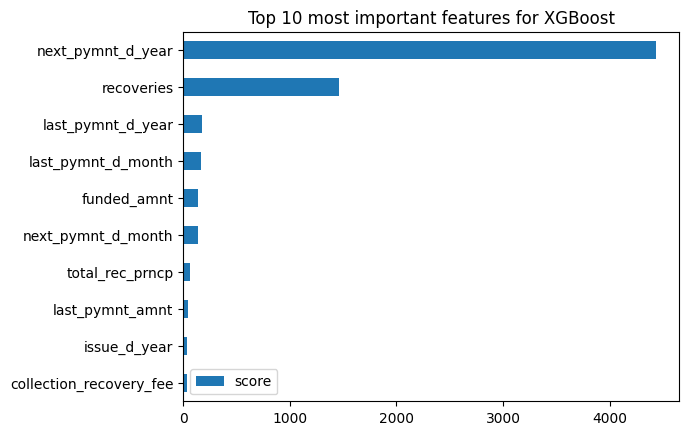

In [104]:
xgb_imp_10 = xgb_feature_imp_df.nlargest(10, columns = ['score']) # Get 10 largest values in dataframe in descending order

xgb_imp_10.plot(kind='barh', 
                title='Top 10 most important features for XGBoost').invert_yaxis()


In [105]:
joblib.dump(xgb, 'models/vanilla_XGB.sav')

['models/vanilla_XGB.sav']

In [106]:
xgb_pca = xgb.fit(x_train_scaled_pca, y_train_enc)
joblib.dump(xgb_pca, 'models/vanilla_XGB_PCA.sav')

['models/vanilla_XGB_PCA.sav']

In [107]:
model_pred_enc = xgb_pca.predict(x_test_scaled_pca)
model_score = metrics.accuracy_score(y_test_enc, model_pred_enc)

model_score

0.9727568798034664

In [108]:
x_train_scaled.shape[1] - x_train_scaled_pca.shape[1]

108

PCA reduces accuracy score by ~1%, which is to be expected as we are eliminating 108 features. <br /> Thereby reducing the number of input features for the model training by 75.52%

## 🤖 Optuna for XGBoost

We will use Optuna on the dataset obtained after applying PCA, otherwise hyperparameter tuning will take a very long time.

In [109]:
x_train_scaled_pca.shape

(709903, 43)

In [116]:
def objective(trial):
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 700, log = True),
        'eta': trial.suggest_float('eta', 1e-2, 1, log = True),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'subsample': trial.suggest_float('subsample', 0, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1),
        'lambda': trial.suggest_float('lambda', 1e-2, 3, log = True)
        # 'min_child_weight': trial.suggest_int('min_child_weight', 10, 40),
        # 'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0, 1),
        # 'colsample_bynode': trial.suggest_float('colsample_bynode', 0, 1),
        # 'gamma': trial.suggest_float('gamma', 1e-3, 5, log = True),
    }

    xgb_opt = XGBClassifier(**xgb_params, 
                            device = 'gpu',
                            objective = 'multi:softmax',
                            seed = seed,
                            n_jobs = -1)
    
    xgb_opt.fit(x_train_scaled_pca, y_train_enc)
    xgb_opt_pred = xgb_opt.predict(x_test_scaled_pca)

    xgb_opt_score = metrics.accuracy_score(y_test_enc, xgb_opt_pred)

    return xgb_opt_score

In [117]:
study = optuna.create_study(direction = 'maximize')

study.optimize(objective, 
               n_trials = 7, 
               n_jobs = -1, 
               show_progress_bar = True)


[I 2024-06-16 18:31:14,356] A new study created in memory with name: no-name-f784edda-8fbe-4a26-80f8-d8a853638f79


  0%|          | 0/7 [00:00<?, ?it/s]

[I 2024-06-16 18:56:51,449] Trial 6 finished with value: 0.9715961594807185 and parameters: {'n_estimators': 252, 'eta': 0.22060731950256474, 'max_depth': 3, 'subsample': 0.8581557326021022, 'colsample_bytree': 0.8065442672416374, 'lambda': 0.0311965672697374}. Best is trial 6 with value: 0.9715961594807185.
[I 2024-06-16 19:15:41,847] Trial 5 finished with value: 0.9307512001622754 and parameters: {'n_estimators': 256, 'eta': 0.9521909557746961, 'max_depth': 8, 'subsample': 0.18528498278630845, 'colsample_bytree': 0.07705619450755397, 'lambda': 0.07267322273511989}. Best is trial 6 with value: 0.9715961594807185.
[I 2024-06-16 19:21:18,327] Trial 0 finished with value: 0.974898014379409 and parameters: {'n_estimators': 326, 'eta': 0.9319112235532259, 'max_depth': 9, 'subsample': 0.9993767338854205, 'colsample_bytree': 0.8535710628904926, 'lambda': 0.38609324630393677}. Best is trial 0 with value: 0.974898014379409.
[I 2024-06-16 19:21:56,382] Trial 2 finished with value: 0.96978746422

In [118]:
opt_params_xgb = study.best_params

opt_xgb = XGBClassifier(**opt_params_xgb, 
                        device = 'gpu',
                        objective = 'multi:softmax',
                        seed = seed,
                        n_jobs = -1)

opt_xgb_fitted = opt_xgb.fit(x_train_scaled_pca, y_train_enc)

joblib.dump(opt_xgb_fitted, 'models/optuna_XGB_PCA_fitted.sav')

['models/optuna_XGB_PCA_fitted.sav']

In [119]:
study.best_value

0.974898014379409

In [120]:
study.best_params

{'n_estimators': 326,
 'eta': 0.9319112235532259,
 'max_depth': 9,
 'subsample': 0.9993767338854205,
 'colsample_bytree': 0.8535710628904926,
 'lambda': 0.38609324630393677}

After tuning XGBoost, we get an accuracy score of 97.5%

In [121]:
xgb_pred = opt_xgb_fitted.predict(x_test_scaled_pca)

In [126]:
cm = metrics.confusion_matrix(y_test_enc, xgb_pred)

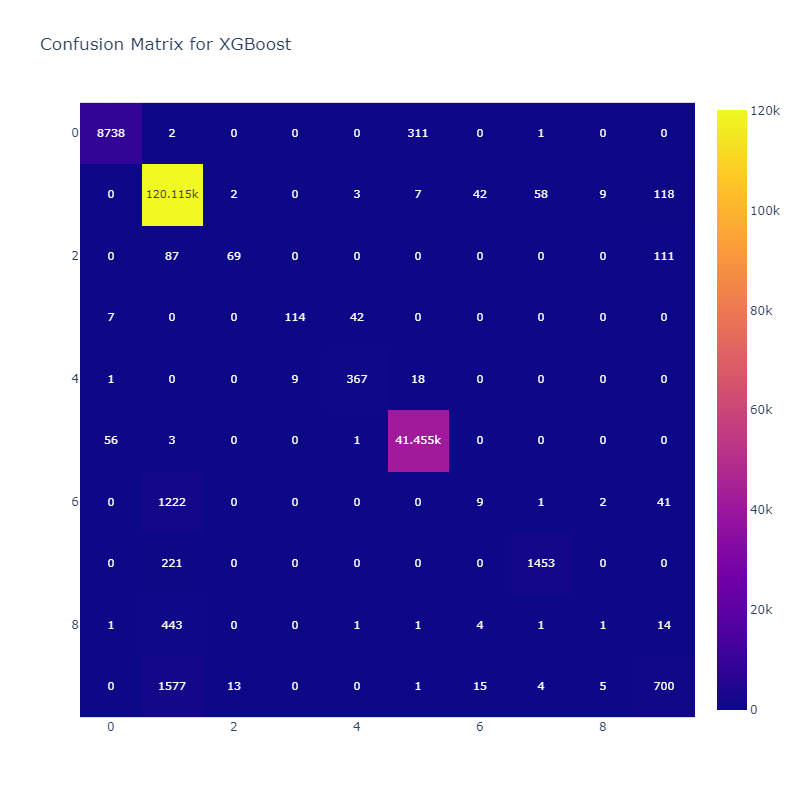

In [131]:
fig = px.imshow(cm, 
                text_auto=True,
                height = 800,
                width = 800,
                title = 'Confusion Matrix for XGBoost')
fig.show()

In [132]:
le.inverse_transform(y_test_enc)

array(['Current', 'Fully Paid', 'Current', ..., 'In Grace Period',
       'Charged Off', 'Charged Off'], dtype=object)

In [135]:
classf_refport_xgb = metrics.classification_report(y_test_enc, xgb_pred)
print(classf_refport_xgb)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9052
           1       0.97      1.00      0.98    120354
           2       0.82      0.26      0.39       267
           3       0.93      0.70      0.80       163
           4       0.89      0.93      0.91       395
           5       0.99      1.00      1.00     41515
           6       0.13      0.01      0.01      1275
           7       0.96      0.87      0.91      1674
           8       0.06      0.00      0.00       466
           9       0.71      0.30      0.42      2315

    accuracy                           0.97    177476
   macro avg       0.74      0.60      0.64    177476
weighted avg       0.96      0.97      0.97    177476



F1 scores for 2, 6, 8, and 9 leave a lot to be desired. This was to be expected as there is an imbalance in the target variable. <br />
Overall the model has an accuracy of 97%.

In [214]:
num, count = np.unique(y_train_enc, return_counts=True) # Return unique elements along with number of occurrences for each
print('Distribution of values in the target variable for training dataset: \n')
for i in zip(num, count, le.inverse_transform(np.unique(y_train_enc))): # Loop through unique element, count of said unique element, and inverse transform aka name of the element
    print(f'{i[2]}\nPercentage: {np.round((i[1]/len(y_train_enc) * 100), 2)}%\nCount: {i[1]}/{len(y_train_enc)}\n')

Distribution of values in the target variable for training dataset: 

Charged Off
Percentage: 5.1%
Count: 36196/709903

Current
Percentage: 67.82%
Count: 481425/709903

Default
Percentage: 0.13%
Count: 952/709903

Does not meet the credit policy. Status:Charged Off
Percentage: 0.08%
Count: 598/709903

Does not meet the credit policy. Status:Fully Paid
Percentage: 0.22%
Count: 1593/709903

Fully Paid
Percentage: 23.41%
Count: 166208/709903

In Grace Period
Percentage: 0.7%
Count: 4978/709903

Issued
Percentage: 0.96%
Count: 6786/709903

Late (16-30 days)
Percentage: 0.27%
Count: 1891/709903

Late (31-120 days)
Percentage: 1.31%
Count: 9276/709903



In [216]:
num, count = np.unique(y_test_enc, return_counts=True) # Return unique elements along with number of occurrences for each
print('Distribution of values in the target variable for testing dataset: \n')
for i in zip(num, count, le.inverse_transform(np.unique(y_test_enc))): # Loop through unique element, count of said unique element, and inverse transform aka name of the element
    print(f'{i[2]}\nPercentage: {np.round((i[1]/len(y_test_enc) * 100), 2)}%\nCount: {i[1]}/{len(y_test_enc)}\n')

Distribution of values in the target variable for testing dataset: 

Charged Off
Percentage: 5.1%
Count: 9052/177476

Current
Percentage: 67.81%
Count: 120354/177476

Default
Percentage: 0.15%
Count: 267/177476

Does not meet the credit policy. Status:Charged Off
Percentage: 0.09%
Count: 163/177476

Does not meet the credit policy. Status:Fully Paid
Percentage: 0.22%
Count: 395/177476

Fully Paid
Percentage: 23.39%
Count: 41515/177476

In Grace Period
Percentage: 0.72%
Count: 1275/177476

Issued
Percentage: 0.94%
Count: 1674/177476

Late (16-30 days)
Percentage: 0.26%
Count: 466/177476

Late (31-120 days)
Percentage: 1.3%
Count: 2315/177476



## 🌳 Random Forest

In [235]:
rf_clf = RandomForestClassifier(random_state = seed,
                                n_jobs = -1)


In [236]:
rf_clf_vanilla = rf_clf.fit(x_train_scaled, y_train)
joblib.dump(rf_clf_vanilla, 'models/vanilla_rf_clf.sav')

['models/vanilla_rf_clf.sav']

In [237]:
rf_pred = rf_clf_vanilla.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, rf_pred))

0.9838400685163065


98% accuracy out of the box. Maybe a classification report will tell a different story.

In [238]:
print(metrics.classification_report(y_test, rf_pred, zero_division=0))

                                                     precision    recall  f1-score   support

                                        Charged Off       1.00      0.98      0.99      9052
                                            Current       0.98      1.00      0.99    120354
                                            Default       1.00      0.03      0.07       267
Does not meet the credit policy. Status:Charged Off       1.00      0.90      0.95       163
 Does not meet the credit policy. Status:Fully Paid       0.96      1.00      0.98       395
                                         Fully Paid       1.00      1.00      1.00     41515
                                    In Grace Period       0.00      0.00      0.00      1275
                                             Issued       1.00      0.87      0.93      1674
                                  Late (16-30 days)       0.00      0.00      0.00       466
                                 Late (31-120 days)       0.87      0

In [239]:
rf_clf_pca = rf_clf.fit(x_train_scaled_pca, y_train_enc)
joblib.dump(rf_clf_pca, 'models/vanilla_RF_PCA.sav')

['models/vanilla_RF_PCA.sav']

In [240]:
rf_clf_pca_pred = rf_clf_pca.predict(x_test_scaled_pca)
print('Accuracy score:', metrics.accuracy_score(y_test_enc, rf_clf_pca_pred))
print(metrics.classification_report(y_test_enc, rf_clf_pca_pred, zero_division=0))

Accuracy score: 0.9667166264734387
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9052
           1       0.96      1.00      0.98    120354
           2       0.00      0.00      0.00       267
           3       0.95      0.49      0.65       163
           4       0.86      0.86      0.86       395
           5       0.97      1.00      0.99     41515
           6       0.00      0.00      0.00      1275
           7       0.95      0.86      0.91      1674
           8       0.00      0.00      0.00       466
           9       0.46      0.04      0.07      2315

    accuracy                           0.97    177476
   macro avg       0.61      0.51      0.54    177476
weighted avg       0.95      0.97      0.96    177476



97% accuracy Random Forest model with PCA.

## 🤖 Optuna for Random Forest

In [244]:
def objective(trial):
    params_rf = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 700, log = True),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        
    }
    
    rf_clf_opt = RandomForestClassifier(**params_rf,
                                        oob_score = True,
                                        n_jobs = -1,
                                        random_state = True)
    
    rf_clf_opt.fit(x_train_scaled_pca, y_train_enc)
    rf_clf_opt_pred = rf_clf_opt.predict(x_test_scaled_pca)

    rf_clf_opt_score = metrics.accuracy_score(y_test_enc, rf_clf_opt_pred)

    return rf_clf_opt_score

In [245]:
study = optuna.create_study(direction='maximize')

study.optimize(objective,
               n_trials = 5,
               n_jobs = -1,
               show_progress_bar=True)

print(study.best_value)
print(study.best_params)

[I 2024-06-16 23:02:03,277] A new study created in memory with name: no-name-7a6849cb-0f66-45fc-925a-ff07b8d6063c


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2024-06-16 23:20:09,789] Trial 2 finished with value: 0.8505093646464874 and parameters: {'n_estimators': 246, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.8505093646464874.
[I 2024-06-16 23:34:19,755] Trial 0 finished with value: 0.9268633505375374 and parameters: {'n_estimators': 324, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9268633505375374.
[I 2024-06-16 23:35:54,656] Trial 3 finished with value: 0.926784466632108 and parameters: {'n_estimators': 347, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9268633505375374.
[I 2024-06-16 23:40:58,593] Trial 1 finished with value: 0.953165498433591 and parameters: {'n_estimators': 277, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.953165498433591.
[I 2024-06-16 23:49:15,952] Trial 4 finished with value: 0.9581408190403209 and parameters: {'n_est

In [249]:
rf_opt = RandomForestClassifier(**study.best_params,
                                oob_score = True,
                                n_jobs = -1,
                                random_state = True)

rf_opt_fit = rf_opt.fit(x_train_scaled_pca, y_train_enc)

joblib.dump(rf_opt_fit, 'models/optuna_RF_PCA_fitted.sav')

['models/optuna_RF_PCA_fitted.sav']

In [264]:
rf_opt.oob_score_

0.9581971058017785

In [250]:
rf_clf_opt_pred = rf_opt.predict(x_test_scaled_pca)

In [251]:
print(metrics.accuracy_score(y_test_enc, rf_clf_opt_pred))

0.9581408190403209


In [252]:
print(metrics.classification_report(y_test_enc, rf_clf_opt_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      9052
           1       0.96      1.00      0.98    120354
           2       0.00      0.00      0.00       267
           3       0.96      0.30      0.46       163
           4       0.81      0.79      0.80       395
           5       0.95      1.00      0.97     41515
           6       0.00      0.00      0.00      1275
           7       0.90      0.81      0.85      1674
           8       0.00      0.00      0.00       466
           9       0.00      0.00      0.00      2315

    accuracy                           0.96    177476
   macro avg       0.56      0.46      0.49    177476
weighted avg       0.94      0.96      0.95    177476



In [254]:
lgbm_clf = LGBMClassifier(random_state=seed,
                          n_jobs = -1)

In [256]:
lgbm_clf_vanilla = lgbm_clf.fit(x_train_scaled, y_train)
joblib.dump(lgbm_clf_vanilla, 'models/vanillaLGBM.sav')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.516914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6830
[LightGBM] [Info] Number of data points in the train set: 709903, number of used features: 147
[LightGBM] [Info] Start training from score -2.976180
[LightGBM] [Info] Start training from score -0.388378
[LightGBM] [Info] Start training from score -6.614319
[LightGBM] [Info] Start training from score -7.079293
[LightGBM] [Info] Start training from score -6.099509
[LightGBM] [Info] Start training from score -1.451888
[LightGBM] [Info] Start training from score -4.960100
[LightGBM] [Info] Start training from score -4.650267
[LightGBM] [Info] Start training from score -5.928023
[LightGBM] [Info] Start training from score -4.337698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

['models/vanillaLGBM.sav']

In [257]:
lgbm_clf_pred = lgbm_clf_vanilla.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, lgbm_clf_pred))

0.9723962676643603


In [258]:
lgbm_clf_vanilla_pca = lgbm_clf.fit(x_train_scaled_pca, y_train)
joblib.dump(lgbm_clf_vanilla_pca, 'models/vanillaLGBM_PCA.sav')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.258251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10965
[LightGBM] [Info] Number of data points in the train set: 709903, number of used features: 43
[LightGBM] [Info] Start training from score -2.976180
[LightGBM] [Info] Start training from score -0.388378
[LightGBM] [Info] Start training from score -6.614319
[LightGBM] [Info] Start training from score -7.079293
[LightGBM] [Info] Start training from score -6.099509
[LightGBM] [Info] Start training from score -1.451888
[LightGBM] [Info] Start training from score -4.960100
[LightGBM] [Info] Start training from score -4.650267
[LightGBM] [Info] Start training from score -5.928023
[LightGBM] [Info] Start training from score -4.337698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

['models/vanillaLGBM_PCA.sav']

In [259]:
lgbm_clf_PCA_pred = lgbm_clf_vanilla_pca.predict(x_test_scaled_pca)
print(metrics.accuracy_score(y_test, lgbm_clf_PCA_pred))

0.95088349974081


## 🤖 Optuna for LGBM

In [273]:
def objective(trial): ## Optuna for LGBM on PCA data
    params_lgbm = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 700),
        'num_leaves': trial.suggest_int('num_leaves', 10, 40),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate ': trial.suggest_float('learning_rate ', 1e-2, 1, log = True),
        'subsample ': trial.suggest_float('subsample ', 0.1, 1, log = True),
        'colsample_bytree ': trial.suggest_float('colsample_bytree ', 0.1, 1, log = True),
        'reg_alpha  ': trial.suggest_float('reg_alpha  ', 0.1, 1, log = True),
        'reg_lambda  ': trial.suggest_float('reg_lambda  ', 0.1, 1, log = True),      
    }
    
    lgbm_opt = LGBMClassifier(**params_lgbm,
                              objective = 'multiclass',
                              verbose = -1,
                              n_jobs = -1,
                              random_state = seed)
    
    lgbm_opt.fit(x_train_scaled_pca, y_train)
    lgbm_opt_pred = lgbm_opt.predict(x_test_scaled_pca)

    lgbm_opt_score = metrics.accuracy_score(y_test, lgbm_opt_pred)

    return lgbm_opt_score

In [269]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,
               n_trials = 5,
               n_jobs=-1,
               show_progress_bar=True)

print(study.best_value)
print(study.best_params)

[I 2024-06-17 02:17:12,209] A new study created in memory with name: no-name-aee4b3f3-eb61-45ff-a27f-2d1daa081edf


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2024-06-17 02:21:19,477] Trial 3 finished with value: 0.6457154770222453 and parameters: {'n_estimators': 303, 'num_leaves': 13, 'max_depth': 1, 'learning_rate ': 0.028380869870466743, 'subsample ': 0.1270032284052082, 'colsample_bytree ': 0.46669473318664834, 'reg_alpha  ': 0.11279453086306704, 'reg_lambda  ': 0.504331342834789}. Best is trial 3 with value: 0.6457154770222453.
[I 2024-06-17 02:31:15,858] Trial 2 finished with value: 0.9603044918749577 and parameters: {'n_estimators': 461, 'num_leaves': 10, 'max_depth': 10, 'learning_rate ': 0.43730947385769287, 'subsample ': 0.5559949385029096, 'colsample_bytree ': 0.5305009750467801, 'reg_alpha  ': 0.3429286162087591, 'reg_lambda  ': 0.15772517094773666}. Best is trial 2 with value: 0.9603044918749577.
[I 2024-06-17 02:33:07,500] Trial 0 finished with value: 0.95933534675111 and parameters: {'n_estimators': 519, 'num_leaves': 22, 'max_depth': 4, 'learning_rate ': 0.011385934780742256, 'subsample ': 0.5131664316996677, 'colsample_b

In [270]:
lgbm_opt = LGBMClassifier(**study.best_params,
                          objective = 'multiclass',
                          verbose = -1,
                          n_jobs = -1,
                          random_state = seed)

lgbm_opt_fitted = lgbm_opt.fit(x_train_scaled_pca, y_train)
joblib.dump(lgbm_opt_fitted, 'models/optuna_LGBM_PCA_fitted.sav')

['models/optuna_LGBM_PCA_fitted.sav']

In [271]:
lgbm_opt_pred = lgbm_opt_fitted.predict(x_test_scaled_pca)

In [272]:
print(metrics.accuracy_score(y_test, lgbm_opt_pred))
print(metrics.classification_report(y_test, lgbm_opt_pred))

0.9603044918749577
                                                     precision    recall  f1-score   support

                                        Charged Off       0.94      0.92      0.93      9052
                                            Current       0.96      0.99      0.98    120354
                                            Default       0.06      0.04      0.05       267
Does not meet the credit policy. Status:Charged Off       0.11      0.01      0.01       163
 Does not meet the credit policy. Status:Fully Paid       0.62      0.68      0.65       395
                                         Fully Paid       0.98      0.99      0.98     41515
                                    In Grace Period       0.02      0.00      0.00      1275
                                             Issued       0.89      0.84      0.86      1674
                                  Late (16-30 days)       0.02      0.01      0.01       466
                                 Late (31-120 days

In [274]:
def objective(trial): # Optuna for LGBM on non-PCA data
    params_lgbm = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 700),
        'num_leaves': trial.suggest_int('num_leaves', 10, 40),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate ': trial.suggest_float('learning_rate ', 1e-2, 1, log = True),
        'subsample ': trial.suggest_float('subsample ', 0.1, 1, log = True),
        'colsample_bytree ': trial.suggest_float('colsample_bytree ', 0.1, 1, log = True),
        'reg_alpha  ': trial.suggest_float('reg_alpha  ', 0.1, 1, log = True),
        'reg_lambda  ': trial.suggest_float('reg_lambda  ', 0.1, 1, log = True),      
    }
    
    lgbm_opt = LGBMClassifier(**params_lgbm,
                              objective = 'multiclass',
                              verbose = -1,
                              n_jobs = -1,
                              random_state = seed)
    
    lgbm_opt.fit(x_train_scaled, y_train)
    lgbm_opt_pred = lgbm_opt.predict(x_test_scaled)

    lgbm_opt_score = metrics.accuracy_score(y_test, lgbm_opt_pred)

    return lgbm_opt_score

In [275]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,
               n_trials = 5,
               n_jobs=-1,
               show_progress_bar=True)

print(study.best_value)
print(study.best_params)

[I 2024-06-17 03:04:09,470] A new study created in memory with name: no-name-b80feb5c-0a98-45b7-bf15-99f0c4edf245


  0%|          | 0/5 [00:00<?, ?it/s]

[I 2024-06-17 03:13:28,264] Trial 0 finished with value: 0.862950483445649 and parameters: {'n_estimators': 367, 'num_leaves': 40, 'max_depth': 6, 'learning_rate ': 0.2261215841802251, 'subsample ': 0.4890201963303621, 'colsample_bytree ': 0.8565364036109722, 'reg_alpha  ': 0.9637723636173355, 'reg_lambda  ': 0.22123091839962894}. Best is trial 0 with value: 0.862950483445649.
[I 2024-06-17 03:13:46,936] Trial 1 finished with value: 0.9364252067885235 and parameters: {'n_estimators': 220, 'num_leaves': 33, 'max_depth': 13, 'learning_rate ': 0.0118724356609562, 'subsample ': 0.4284821101186297, 'colsample_bytree ': 0.28976132287051437, 'reg_alpha  ': 0.4353666053338796, 'reg_lambda  ': 0.15788682154893227}. Best is trial 1 with value: 0.9364252067885235.
[I 2024-06-17 03:16:16,208] Trial 4 finished with value: 0.8692273884919651 and parameters: {'n_estimators': 254, 'num_leaves': 40, 'max_depth': 20, 'learning_rate ': 0.20909549027246324, 'subsample ': 0.19422319888065176, 'colsample_by

In [276]:
lgbm_opt = LGBMClassifier(**study.best_params,
                          objective = 'multiclass',
                          verbose = -1,
                          n_jobs = -1,
                          random_state = seed)

lgbm_opt_reg_fitted = lgbm_opt.fit(x_train_scaled, y_train)
joblib.dump(lgbm_opt_reg_fitted, 'models/optuna_LGBM_REG_fitted.sav')

['models/optuna_LGBM_REG_fitted.sav']

In [278]:
lgbm_opt_reg_pred = lgbm_opt_reg_fitted.predict(x_test_scaled)

In [281]:
study.best_value

0.9553235367035543

In [279]:
print(metrics.accuracy_score(y_test, lgbm_opt_reg_pred))
print(metrics.classification_report(y_test, lgbm_opt_reg_pred))

0.5844339516328968
                                                     precision    recall  f1-score   support

                                        Charged Off       0.21      0.02      0.03      9052
                                            Current       0.96      0.76      0.85    120354
                                            Default       0.00      0.06      0.00       267
Does not meet the credit policy. Status:Charged Off       0.00      0.01      0.00       163
 Does not meet the credit policy. Status:Fully Paid       0.01      0.15      0.01       395
                                         Fully Paid       0.79      0.26      0.39     41515
                                    In Grace Period       0.01      0.08      0.02      1275
                                             Issued       0.00      0.00      0.00      1674
                                  Late (16-30 days)       0.00      0.00      0.00       466
                                 Late (31-120 days